This script is to compare (a) the volume calcuated by neuron_morphology.features.size from Allen Cell Types Database' SWC file for each cell and (b) the volume provided in morphology feature provided in Allen Cell Types Database' morphology documentation (calculated with Vaa3D plugin "Compute Global Features" defined in L-Measure). 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 50)

In [2]:
# volume calcuated by neuron_morphology.features.size
nm_df = pd.read_csv('../result/total_volume.tsv',sep='\t')

In [3]:
nm_df.rename(columns={'Total_Volume':'nm_volume'},inplace=True)

In [4]:
nm_df

,Species,Specimen_ID,nm_volume
0,Mouse,555241040,3149.566951
1,Mouse,530737765,3417.700939
2,Mouse,584872371,1615.318717
3,Mouse,574038330,3222.967900
4,Mouse,477127614,1757.481249
...,...,...,...
362,Human,508298270,16576.774950
363,Human,545612828,27087.010782
364,Human,527952884,2222.127063
365,Human,561469082,7546.625958


In [5]:
morpho_df = pd.read_csv('../data/cell_types/morphology_features.csv')

In [6]:
# Some cell's data were superseded
morpho_df[morpho_df.duplicated(['specimen_id'],keep=False)][['id','superseded','specimen_id']].sort_values(by='specimen_id')

,id,superseded,specimen_id
17,759904803,False,313862167
489,501934125,True,313862167
218,657210204,True,321708130
568,759896998,False,321708130
651,760196580,False,323475862
...,...,...,...
298,705676705,True,571520182
358,759945387,False,593312584
97,647493963,True,593312584
642,651089035,True,601958555


In [7]:
morpho_lite_df = morpho_df[morpho_df['superseded']==False]

In [8]:
# Filtering out the superceded data resolves the duplicated cell ID problem
morpho_lite_df[morpho_lite_df.duplicated(['specimen_id'],keep=False)]

,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,...,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,specimen_id,superseded,tags,total_length,total_surface,total_volume


In [9]:
Vaa3D_df = morpho_lite_df[['specimen_id','total_volume']].copy(deep=True)

In [10]:
Vaa3D_df.rename(columns={'total_volume':'Vaa3D_volume'},inplace=True)

In [11]:
Vaa3D_df

,specimen_id,Vaa3D_volume
0,478107198,167.343086
1,502367941,921.571895
2,515771244,582.285423
3,561435279,740.722806
4,591268268,69.144146
...,...,...
696,526785799,1262.798767
697,487667205,119.655664
698,571735073,3912.667582
699,528687520,273.870722


In [12]:
df = pd.merge(left=nm_df,right=Vaa3D_df,left_on='Specimen_ID',right_on='specimen_id',how='inner')

In [13]:
df.drop(columns=['specimen_id'],inplace=True)

In [14]:
df # the cell volume calculated from the neuron_morphology package is different from that calculated from Vaa3D_volume

,Species,Specimen_ID,nm_volume,Vaa3D_volume
0,Mouse,555241040,3149.566951,101.077125
1,Mouse,530737765,3417.700939,790.996803
2,Mouse,584872371,1615.318717,284.329839
3,Mouse,574038330,3222.967900,941.113544
4,Mouse,477127614,1757.481249,63.081521
...,...,...,...,...
362,Human,508298270,16576.774950,7924.622687
363,Human,545612828,27087.010782,16108.163739
364,Human,527952884,2222.127063,924.634885
365,Human,561469082,7546.625958,2115.058193


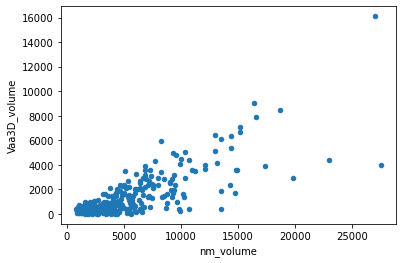

In [15]:
df.plot.scatter(x='nm_volume',y='Vaa3D_volume')

In [16]:
import pingouin as pg

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [17]:
pg.corr(df['nm_volume'],df['Vaa3D_volume']) # The two volumes are strongly correlated though

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,367,0.790612,"[0.75, 0.83]",0.625068,0.623008,9.295004e-80,1.401e+76,1.0


In [18]:
pg.corr(df['nm_volume'],df['Vaa3D_volume'],method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,367,0.643878,"[0.58, 0.7]",0.414578,0.411362,2.360901e-44,1.0


In [19]:
# Save both volumes to a file
df.to_csv('../result/nm_Vaa3D_volume.tsv',sep='\t',index=False)

In [20]:
df.drop(columns=['nm_volume'],inplace=True)

In [21]:
# export the dataframe with precalculated total neuron volumes to a tsv file
df.to_csv('../result/Vaa3D_volume.tsv',sep='\t',index=False)